In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']
x.head(),y.head()

(0    1.462108
 1    1.133769
 2   -2.301539
 3    1.744812
 4    0.042214
 Name: 0, dtype: float64,
 0    101.159902
 1     78.442913
 2   -159.238195
 3    120.719533
 4      2.920673
 Name: 0, dtype: float64)

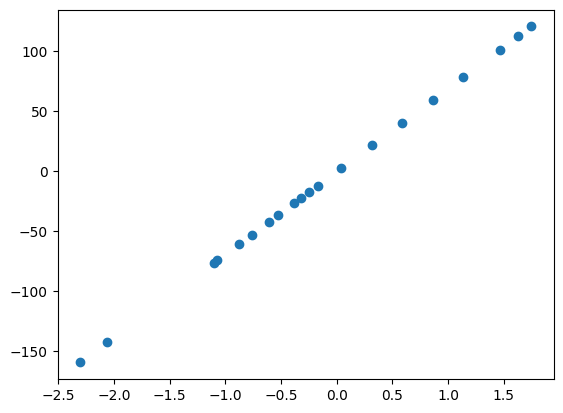

In [3]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [4]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [5]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


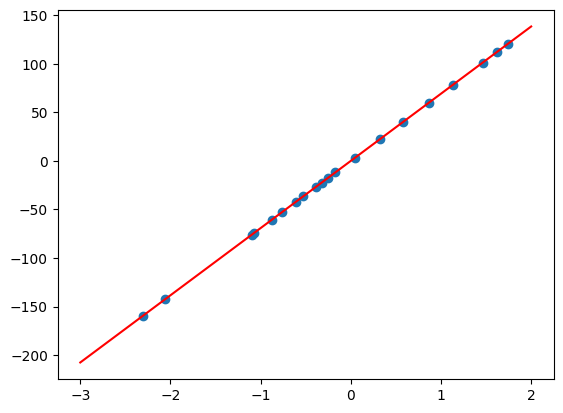

In [6]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

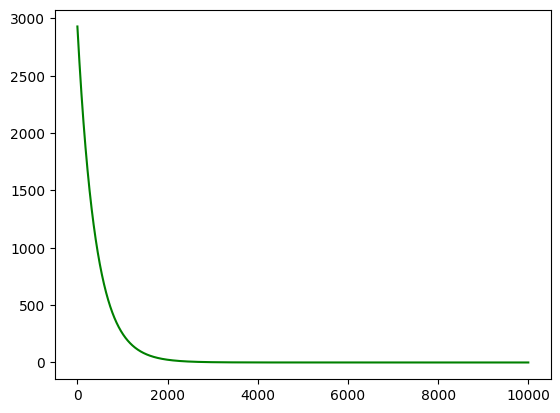

In [7]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# 1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

error after gradient descent: 6626.092232129423


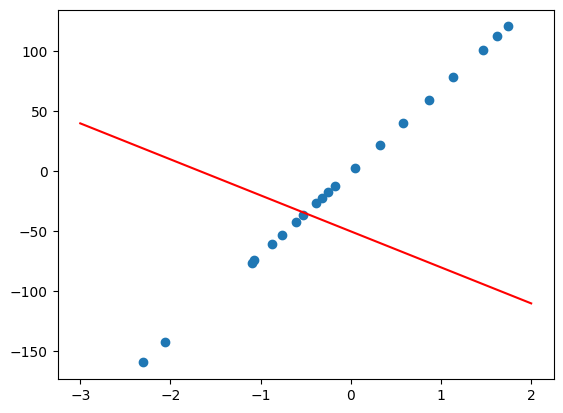

In [8]:
hyp = Model()
hyp.b0=-50
hyp.b1=-30
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)


plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 2.4855082353004656e-05


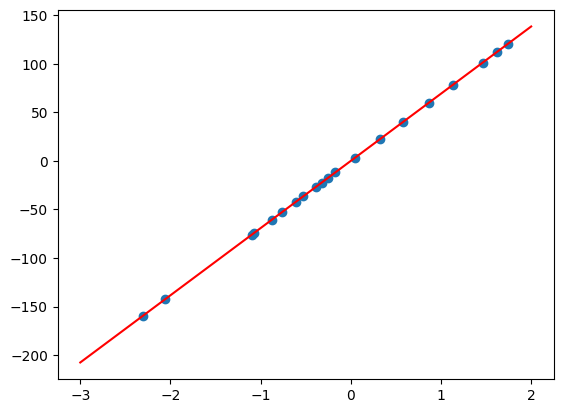

In [9]:
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

error after gradient descent: 253.47092542308437


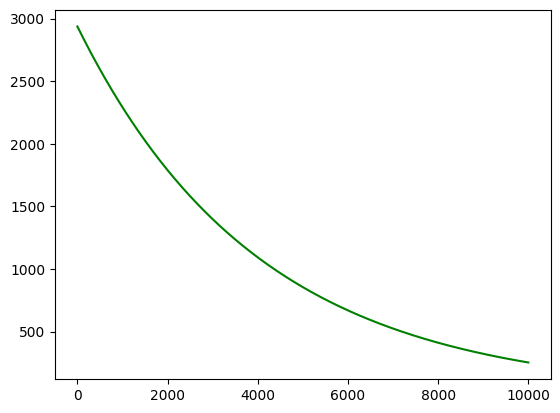

In [10]:
hyp = Model()
steps, errors = hyp.fit(x, y,alpha=0.0001)
J = hyp.error(x, y)
print("error after gradient descent:", J)

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

error after gradient descent: 2.5879568071906823e-29


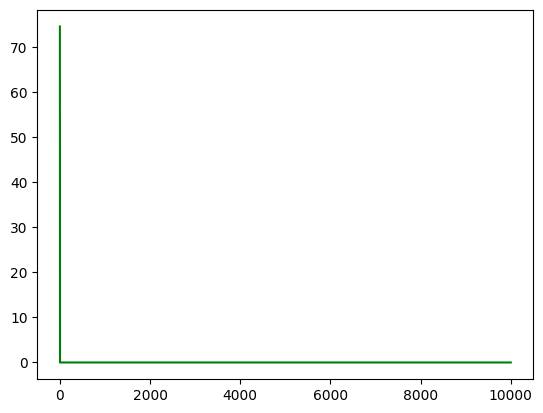

In [11]:
hyp = Model()
steps, errors = hyp.fit(x, y,alpha=0.9)
J = hyp.error(x, y)
print("error after gradient descent:", J)

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

error after gradient descent: inf


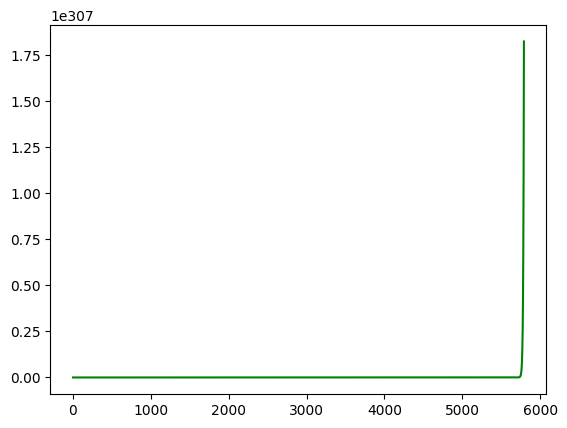

In [12]:
hyp = Model()
steps, errors = hyp.fit(x, y,alpha=1.6)
J = hyp.error(x, y)
print("error after gradient descent:", J)

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# 4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

error after gradient descent: 0.049925319756558145
4880


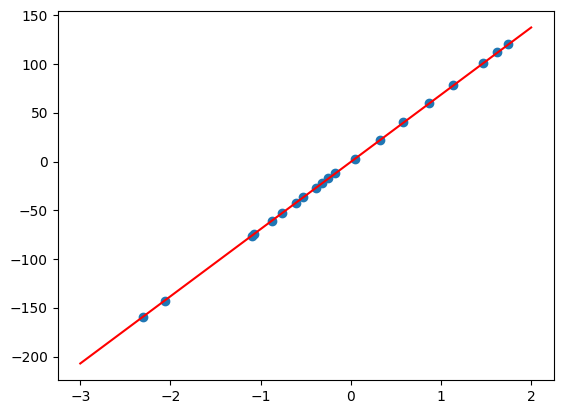

In [15]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.0001, max_steps=10000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            if len(errors)>1:
                epsilon= abs(new_err - errors[-1])
                if epsilon<accuracy:
                    break
            errors.append(new_err)
            
        return steps, errors

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
print(len(errors))

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# 6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

error after gradient descent: 2.8884497208956515e-06
8


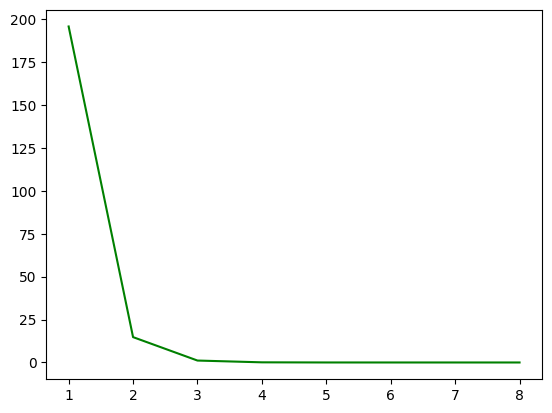

In [26]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.99, accuracy=0.0001, max_steps=10000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            if len(errors) > 1:
                
                if new_err > errors[-1]:
                    alpha/=2
                    
                epsilon= abs(new_err - errors[-1])
                if epsilon<accuracy:
                    errors.append(new_err)
                    break
            errors.append(new_err)
            
        return steps, errors

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
print(len(errors))

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()